In [306]:
# importing relevant libraries
import random
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import binom, norm
from math import sqrt


In [307]:
# function returning true with probability 1/2, simulation going to the left if true, right if false
def simulate_prob():
    return random.random() < 0.5

In [308]:
def galton_simulation(n, N):
    # initialize an n+1 size array for counts
    counts = np.zeros(n + 1, dtype=int)  
    
    for _ in range(N): # doing the experiment N times
        i = 0
        for _ in range(n): # the ball moves one level n times
            if simulate_prob():
                i += 1
        counts[i] += 1  # increment count for the final position
    
    return counts

In [309]:
def get_mu_and_sd(counts_array, n, N):
    # calculating mu
    mu_simulation = 0
    for i in range(n+1):
        mu_simulation += i * counts_array[i]
    mu_simulation = mu_simulation/N
    
    # calculating sd
    variance = 0 
    for i in range(n+1):
        variance += (mu_simulation - i)**2 * counts_array[i]
    variance = variance/N
    sd_simulation = sqrt(variance)
    return mu_simulation, sd_simulation

In [311]:
def show_plot(n, N, p):
    # result of the simulation
    galton_counts = galton_simulation(n, N)
    galton_probabilities = galton_counts / N 

    # calculating mu and sd
    mu_simulation, sd_simulation= get_mu_and_sd(galton_counts, n, N)
    print(f"mu: {mu_simulation}\nsd: {sd_simulation}")

    # binomial distribution
    k = np.arange(0, n+1)
    binomial_pmf = binom.pmf(k, n, p) # model a probabilistic experiments with the help of binomial distribution

    # normal distribution
    x = np.linspace(0, n, 10*n)
    normal_pdf = norm.pdf(x, mu_simulation, sd_simulation) # model a probabilistic density function following normal distribution 
    
    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot Galton board results
    plt.bar(k, galton_probabilities, width=0.9, color='red', alpha=0.5, label='Galton Simulation')

    # Plot binomial distribution
    plt.bar(k, binomial_pmf, width=0.4, color='blue', alpha=0.7, label='Binomial Distribution')

    # Plot normal distribution
    plt.plot(x, normal_pdf, 'k--', label='Normal Distribution')

    # Adding labels and legend
    plt.title(f'Galton Board vs Binomial vs Normal Distribution (n={n}, N={N})')
    plt.xlabel('Number of successes (k)')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True)
    plt.show()

In [312]:
# function simulating the galton board using a matrix. this function is not used as i found using an array more practical
def galton_simulation_matrix(n, N):
    # initialize an n+1 x n+1 matrix with zeros, as the ball drop from (0,0)
    matrix = np.zeros((n + 1, n + 1), dtype=int)

    for _ in range(N):  # drop N balls
        i = 0  
        for _ in range(n): # each ball drops n levels before end position
            if simulate_prob():
                i += 1  # move to the left (increase row index)

        # increment the count in the final position
        matrix[i][n - i] += 1  # update the matrix for the final position
    
    return matrix # returning the matrix with the results on the diagonal


mu: 5.066666666666666
sd: 1.1234866364235145
mse: 0.001891838484596443


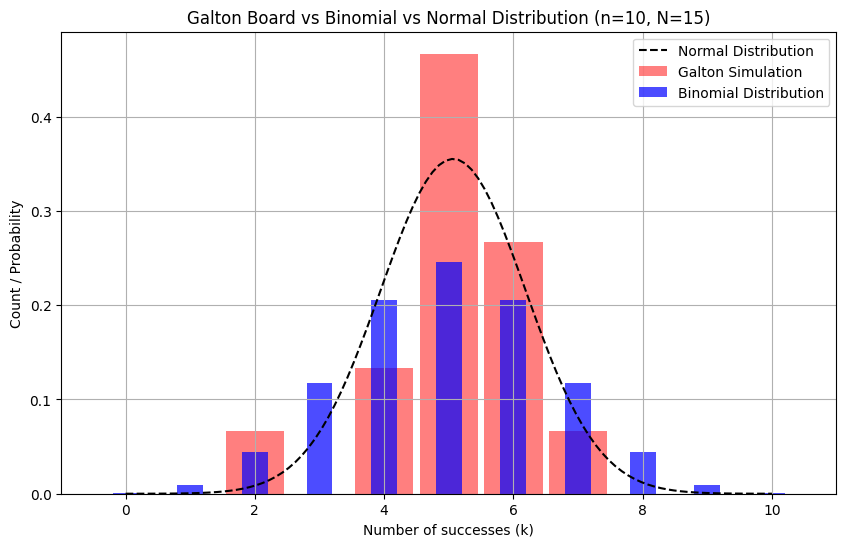

In [313]:
# small sample
p = 0.5 # probability of going left
n = 10  # number of levels
N = 15  # number of balls
show_plot(n, N, p)

mu: 5.0228
sd: 1.5682092207355498
mse: 1.4405335400463486e-05


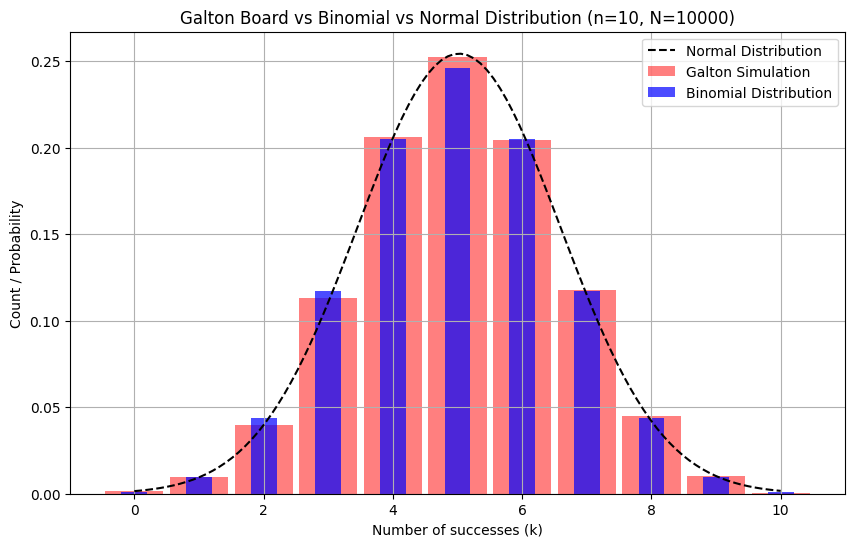

In [314]:
# large N
p = 0.5 # probability of going left
n = 10  # number of levels
N = 10000  # number of balls

# result of the simulation
show_plot(n, N, p)


mu: 50.5
sd: 4.674398357008098
mse: 5.153612650602753e-06


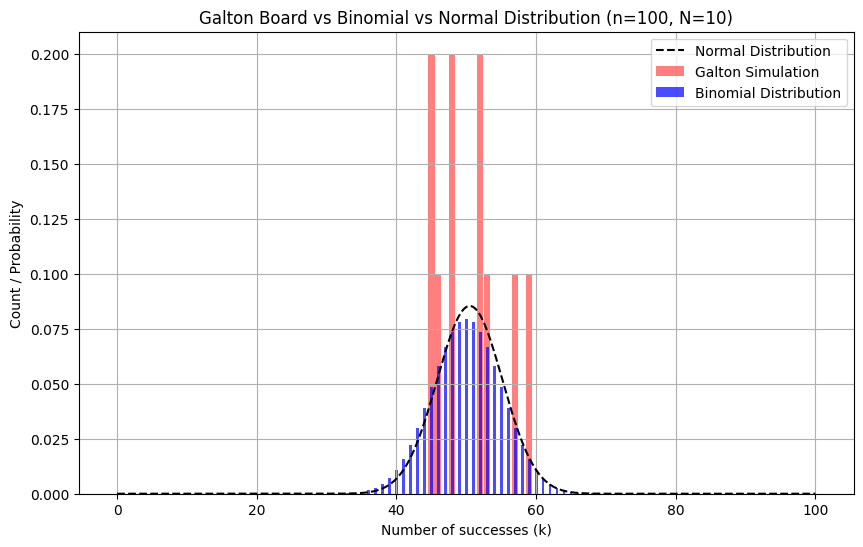

In [315]:
# large n
p = 0.5 # probability of going left
n = 100  # number of levels
N = 10  # number of balls
show_plot(n, N, p)

mu: 49.934
sd: 4.998964292731046
mse: 5.146196369880638e-08


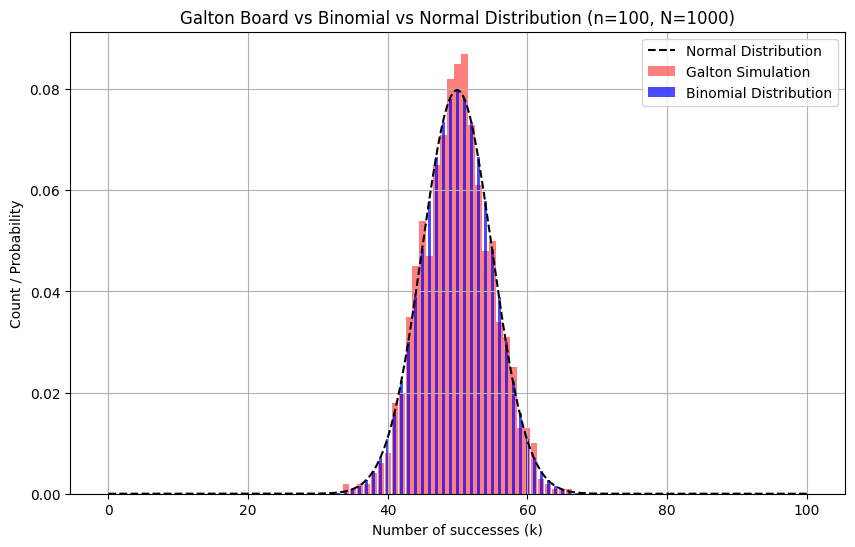

In [316]:
# large n & large N
p = 0.5 # probability of going left
n = 100  # number of levels
N = 1000  # number of balls
show_plot(n, N, p)